<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-3/blob/main/Abalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

In [2]:
!wget https://www.dropbox.com/s/2hsbbd0avyonhfs/Abalos.zip?dl=0 -O abalos.zip

--2021-05-13 12:25:56--  https://www.dropbox.com/s/2hsbbd0avyonhfs/Abalos.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2hsbbd0avyonhfs/Abalos.zip [following]
--2021-05-13 12:25:56--  https://www.dropbox.com/s/raw/2hsbbd0avyonhfs/Abalos.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30b404ee01f6287adec9823958.dl.dropboxusercontent.com/cd/0/inline/BOahyziS4aN2ibzSA8QYAUJ3e-8_lydlAEDMkV1aw0AMoc7JMg-PNykcUFjBZHFMflurUJFPbxsifIgPIZc28oeHJNVy2XNj-HrRnB1xozoic5CUVRVdwecav3dFkHom4iEwe9Hl4uzD0WpUBmp_6MPa/file# [following]
--2021-05-13 12:25:57--  https://uc30b404ee01f6287adec9823958.dl.dropboxusercontent.com/cd/0/inline/BOahyziS4aN2ibzSA8QYAUJ3e-8_lydlAEDMkV1aw0AMoc7JMg-PNykcUFjBZHFMflurUJFPbxsifIgPIZc28oeHJNV

In [3]:
!unzip abalos.zip

Archive:  abalos.zip
  inflating: Abalos/Abalos_01.jpg    
  inflating: Abalos/Abalos_02.jpg    
  inflating: Abalos/Abalos_03.jpg    
  inflating: Abalos/Abalos_04.jpg    
  inflating: Abalos/Abalos_05.jpg    
  inflating: Abalos/Abalos_06.jpg    
  inflating: Abalos/Abalos_07.jpg    


In [5]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

In [13]:
def identificar_leyenda(leyenda):
    clone = leyenda.copy()
    gray = cv2.cvtColor(leyenda, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 225, 30, cv2.THRESH_OTSU)[1]
    cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  

    for (i, c) in enumerate(cnts):
        area = cv2.contourArea(c)
        if area>34000 and area<36000:
            return (i,c)

In [20]:
import os
# Cargando imágenes de Abalos
abalos = {}
leyendas={}
for image in os.listdir("Abalos"):
    imagen=cv2.imread("Abalos/" + image)
    numero=int(image[-6:-4])
    abalos[numero]=imagen


    
    (i,c) = identificar_leyenda(imagen)
    (a,b,c,d) = cv2.boundingRect(c)
    x=a
    y=b
    finX=a+c
    finY=b+d
    leyenda=imagen[y:finY,x:finX]
    #mostrarImagen(leyenda)
    leyendas[numero]=leyenda


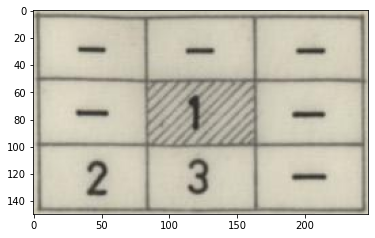

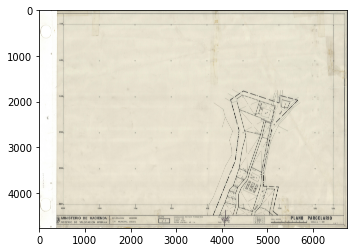

>------------------------------------------------<


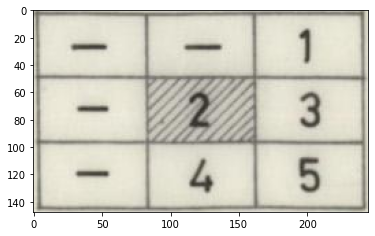

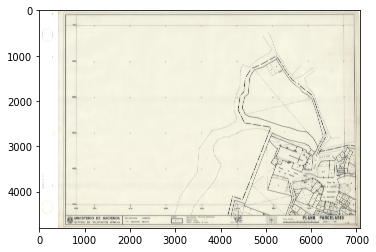

>------------------------------------------------<


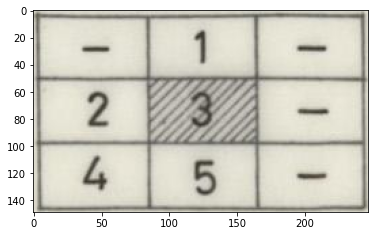

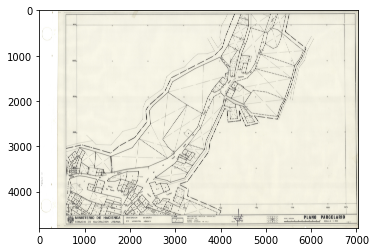

>------------------------------------------------<


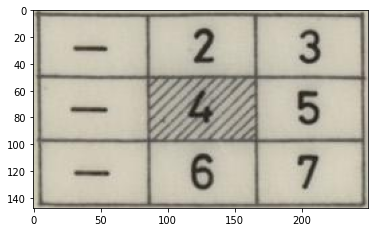

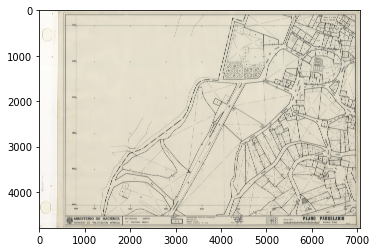

>------------------------------------------------<


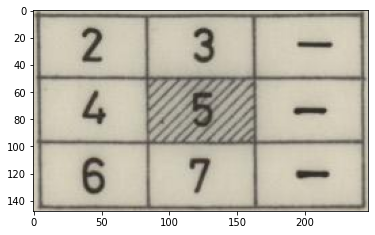

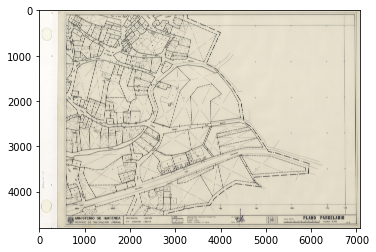

>------------------------------------------------<


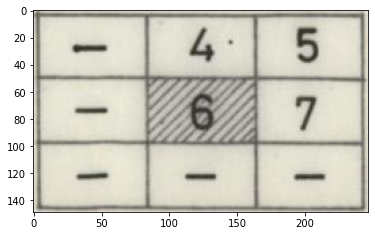

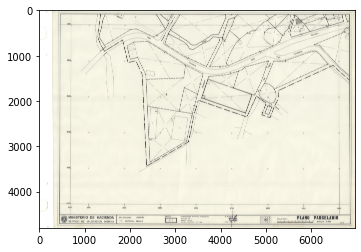

>------------------------------------------------<


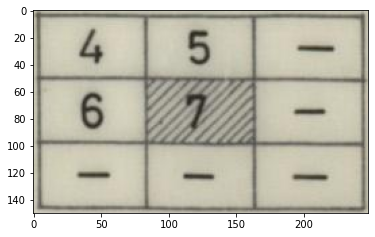

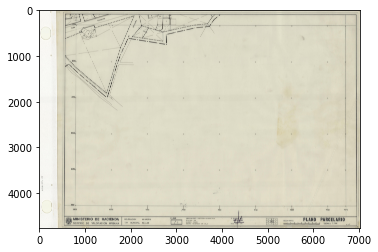

>------------------------------------------------<


In [32]:
for i in range(1,8):
  mostrarImagen(leyendas[i]) 
  mostrarImagen(abalos[i])
  print('>------------------------------------------------<')

In [ ]:
clone= leyenda.copy()
gray = cv2.cvtColor(leyenda, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 30, cv2.THRESH_OTSU)[1]
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
clone= leyenda.copy()
gray = cv2.cvtColor(abalos[1], cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 30, cv2.THRESH_OTSU)[1]
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

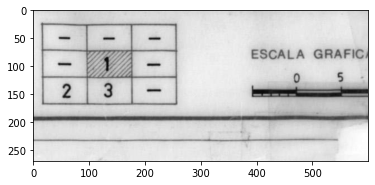

In [ ]:
mostrarImagen(gray)

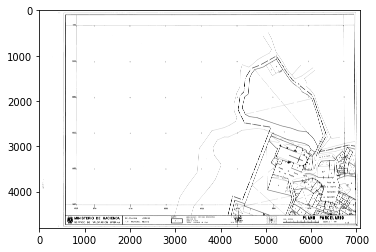

In [ ]:
mostrarImagen(thresh)

Contorno #489 -- solidity=1.00 -- area=35108.50 -- aspectRatio=1.66 -- extent=0.97 -- hullArea=35715.00


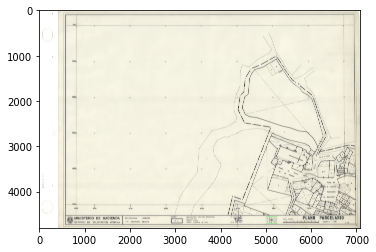

In [ ]:
contorno_casillas=[]
for (i, c) in enumerate(cnts):
    # Calculamos diversas propiedades
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    #solidity = area / float(hullArea)

    if area>34000 and area<36000:
        contorno_casillas.insert(i,c)
        # Visualizamos cada contorno y el convex hull asociado al mismo
        cv2.drawContours(clone, [c], -1, (240, 0, 159), 3)
        print("Contorno #{} -- solidity={:.2f} -- area={:.2f} -- aspectRatio={:.2f} -- extent={:.2f} -- hullArea={:.2f}".
              format(i + 1, solidity,area,aspectRatio,extent,hullArea))
        clone = abalos[1].copy()
        cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
        mostrarImagen(clone)